Name: William Valli
# Introduction
For my individual section of our group's project, I focused on the amount of parks and open spaces as a measure of neighborhood quality. Access to parks is strongly associated with improved mental and physical health, community and activity. In many cities and neighborhoods, these parks help contribute to the residents' quality of life. To start off, I opened the dataset and filtered to only park/open space type and removed entries with an empty neighborhood field. 

In [40]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

dataset = pd.read_csv('parks.csv')

parks = dataset[dataset["type"].isin(["Park", "Open Space"])].copy() # filter dataset to parks and open spaces
parks = parks[parks["neighborhood"].str.strip() != ""]  # remove parks with empty neighborhood fields

Here, the number of parks per neighborhood are counted and sorted by ascending order. You can see the total amount of neighborhoods, total number of parks, the average number of parks per neighborhood, and every neighborhood alongside their park count.

In [72]:
neighborhood_counts = parks['neighborhood'].value_counts() # count the amount of parks and open spaces per neighborhood
sorted_counts = neighborhood_counts.sort_values() # sort neighborhoods

print(f"number of neighborhoods: {sorted_counts.count()}")
print(f"number of parks: {parks["id"].count()}")
print (f"average number of parks per neighborhood: {sorted_counts.mean()}\n")

for name, count in sorted_counts.items():
    print(f"{name}: {count}")

number of neighborhoods: 71
number of parks: 159
average number of parks per neighborhood: 2.23943661971831

Homewood North: 1
East Hills: 1
East Carnegie: 1
Arlington: 1
Homewood West: 1
Stanton Heights: 1
Hays: 1
Central Lawrenceville: 1
Homewood South: 1
Morningside: 1
Larimer: 1
West Oakland: 1
Point Breeze: 1
New Homestead: 1
Upper Hill: 1
Oakwood: 1
Bon Air: 1
Windgap: 1
Fairywood: 1
Bedford Dwellings: 1
Esplen: 1
Middle Hill: 1
Bluff: 1
Swisshelm Park: 1
West End: 1
Squirrel Hill North: 1
Point Breeze North: 1
Polish Hill: 1
Highland Park: 2
Perry South: 2
Terrace Village: 2
Fineview: 2
Westwood: 2
Banksville: 2
Duquesne Heights: 2
Lincoln-Lemington-Belmar: 2
Central Oakland: 2
Lincoln Place: 2
Brookline: 2
Spring Garden: 2
Crafton Heights: 2
Perry North: 2
Strip District: 2
Allegheny Center: 2
Allentown: 2
Central Northside: 3
Spring Hill-City View: 3
Lower Lawrenceville: 3
Squirrel Hill South: 3
Beltzhoover: 3
Bloomfield: 3
Manchester: 3
Garfield: 3
North Shore: 3
Upper Lawren

# Distribution
Now that we have each neighborhood and their park count, we can add each count and a counter to a dictionary so we can count the amount of neighborhoods have X many parks.

The results show that every neighborhood ranges between 1-6 parks, with lower counts being more common.

In [50]:
count_dict = {}

for _, count in sorted_counts.items(): # neighborhood name unneeded, can throw away
    if count in count_dict:
        count_dict[count] += 1 # iterate if number in dictionary
    else:
        count_dict[count] = 1 # if not found then add it to dictionary

for count in count_dict:
    print(f"neighborhoods with {count} park(s): {count_dict[count]}")

neighborhoods with 1 park(s): 28
neighborhoods with 2 park(s): 17
neighborhoods with 3 park(s): 15
neighborhoods with 4 park(s): 5
neighborhoods with 5 park(s): 4
neighborhoods with 6 park(s): 2


# Graphs

Next, I decided to graph all of the neighborhoods and their park values on a bar graph so it can be easily visualized, alongside graphing the 10 neighborhoods with the highest park count, so we can see what parks are "best". To get the 10 best neighborhoods, we grab the 10 neighborhoods from the *tail* of the sorted_counts series, as the higher counts are at the end of the series. From these graphs, we can see how the overall graph grows quadratic-like, and we can see that the only two neighborhoods with 6 parks are **Beechview** and **South Side Slopes**.

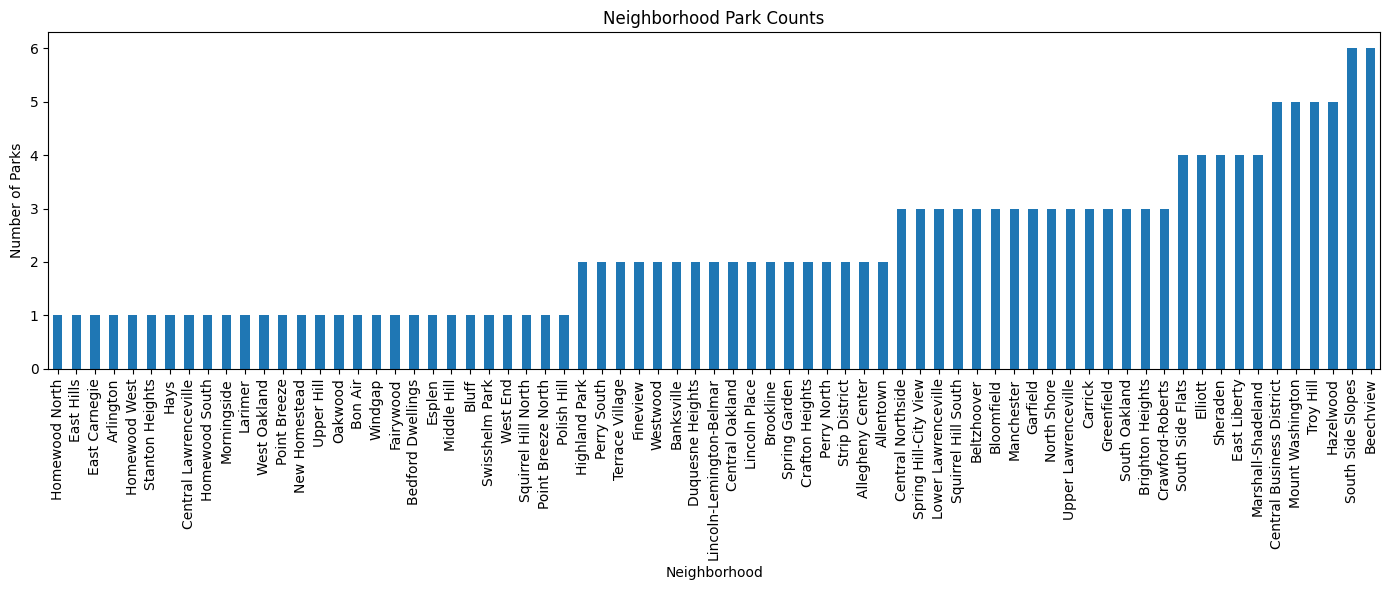

In [68]:
sorted_counts.plot(kind='bar', figsize=(14, 6))
plt.title('Neighborhood Park Counts')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Parks')
plt.xticks(rotation = 90)
plt.tight_layout()

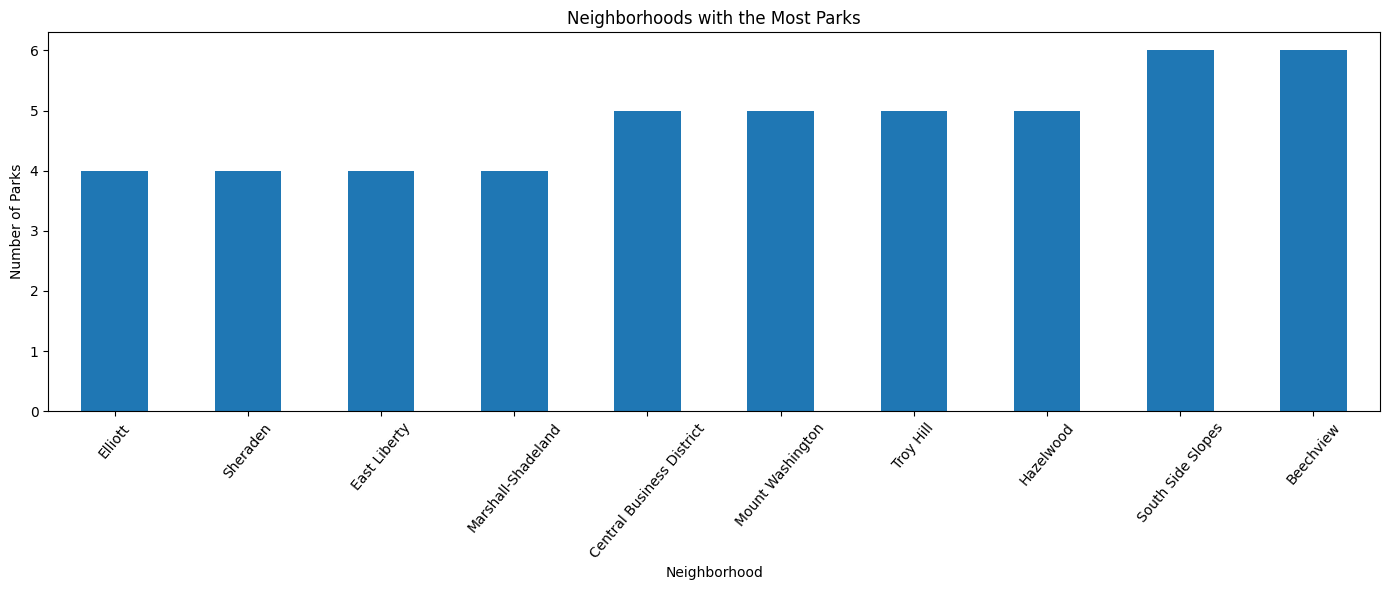

In [69]:
ten_most = sorted_counts.tail(10) # more parks = higher quality of life
ten_most.plot(kind='bar', figsize=(14, 6))
plt.title('Neighborhoods with the Most Parks')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Parks')
plt.xticks(rotation = 50)
plt.tight_layout()

# What are the "worst" neighborhoods?
Using the neighborhood park counts we found in the distribution earlier, we can see that 28 neighborhoods only have one park. We can easily get these by grabbing the first 28 neighborhoods at the head of the sorted_counts series, as the head are the lowest counts.

These 28 neighborhoods are: Homewood North, East Hills, East Carnegie, Arlington, Homewood West, Stanton Heights, Hays, Central Lawrenceville, Homewood South, Morningside, Larimer, West Oakland, Point Breeze, New Homestead, Upper Hill, Oakwood, Bon Air, Windgap, Fairywood, Bedford Dwellings, Esplen, Middle Hill, Bluff, Swisshelm Park, West End, Squirrel Hill North, Point Breeze North, and Polish Hill.

In [56]:
only_one = sorted_counts.head(28) # get the 28 neighborhoods with 1 park (found from earlier count)

print("neighborhoods containing only one park:")
for name, count in only_one.items():
    print(f"{name}: {count}")

neighborhoods containing only one park:
Homewood North: 1
East Hills: 1
East Carnegie: 1
Arlington: 1
Homewood West: 1
Stanton Heights: 1
Hays: 1
Central Lawrenceville: 1
Homewood South: 1
Morningside: 1
Larimer: 1
West Oakland: 1
Point Breeze: 1
New Homestead: 1
Upper Hill: 1
Oakwood: 1
Bon Air: 1
Windgap: 1
Fairywood: 1
Bedford Dwellings: 1
Esplen: 1
Middle Hill: 1
Bluff: 1
Swisshelm Park: 1
West End: 1
Squirrel Hill North: 1
Point Breeze North: 1
Polish Hill: 1


# Result
So, to recap, the two "best" neighborhoods with 6 parks are **Beechview** and **South Side Slopes**. The "worst" neighborhood in the dataset is a 28-way tie between many smaller neighborhoods, and can be seen right above this.